 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [327]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import quandl

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [328]:
# Reading whale returns
whale_csv = Path("Resources/whale_returns.csv")
whale_data = pd.read_csv(whale_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)

whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [329]:
# Count nulls
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [330]:
# Drop nulls
whale_data.dropna(inplace=True)
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [331]:
# Reading algorithmic returns
algo_csv = Path("Resources/algo_returns.csv")
algo_data = pd.read_csv(algo_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_data.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [332]:
# Count nulls
algo_data.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [333]:
# Drop nulls
algo_data.dropna(inplace=True)
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [334]:
# Reading S&P 500 Closing Prices
sp500_csv = Path("Resources/sp500_history.csv")
sp500_data = pd.read_csv(sp500_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_data.head()


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [335]:
# Check Data Types
sp500_data.dtypes


Close    object
dtype: object

In [336]:
# Fix Data Types

sp500_data['Close'] = sp500_data['Close'].apply(lambda x: float(x.split()[0].replace('$', '')))

sp500_data.dtypes
sp500_data.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [337]:
# Calculate Daily Returns
sp500_data.sort_index(inplace=True)

spx_daily_returns = sp500_data.pct_change()
spx_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [338]:
# Drop nulls
spx_daily_returns.dropna(inplace=True)
spx_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [339]:
# Rename `Close` Column to be specific to this portfolio.
spx_daily_returns.columns = ['SPX500']
spx_daily_returns.head()


,SPX500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [340]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_data, algo_data, spx_daily_returns], axis="columns", join="inner")
combined_df.sort_index(inplace=True)

combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPX500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

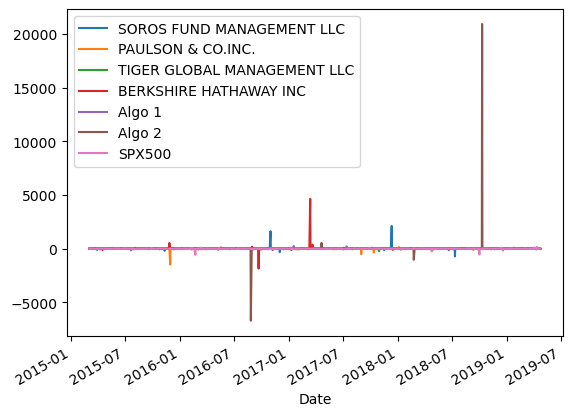

In [341]:
# Plot daily returns of all portfolios
combined_df_daily_returns = combined_df.pct_change()
combined_df_daily_returns.dropna(inplace=True)
combined_df_daily_returns.plot()

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

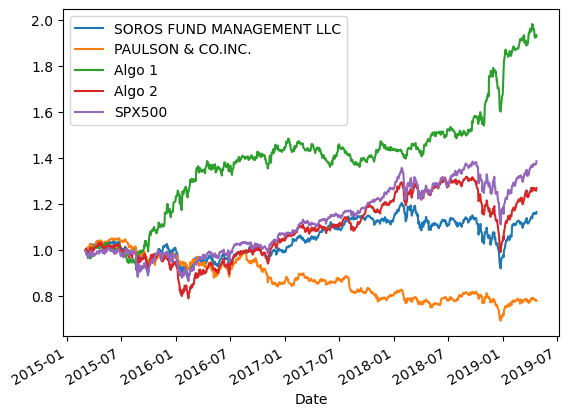

In [382]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

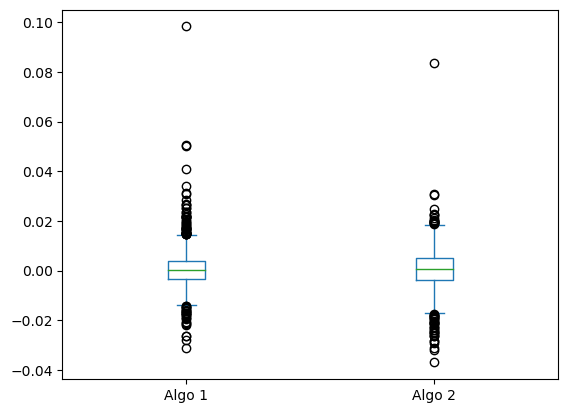

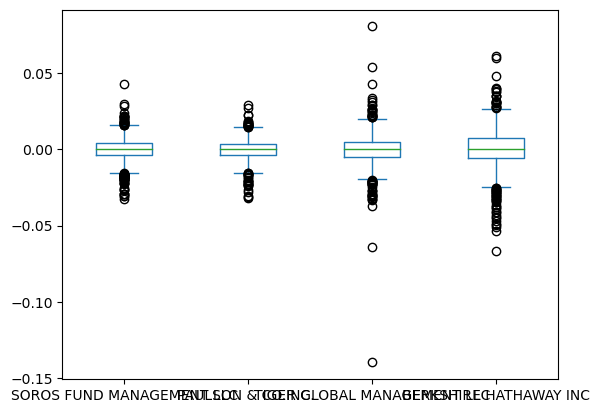

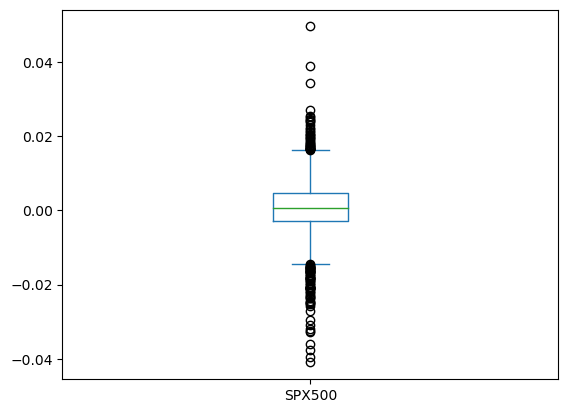

In [381]:
# Box plot to visually show risk
algo_data.plot.box()

whale_data.plot.box()

spx_daily_returns.plot.box()

### Calculate Standard Deviations

In [344]:
# Calculate the daily standard deviations of all portfolios
portfolio_std = combined_df.std()
portfolio_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SPX500                         0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [345]:
# Calculate  the daily standard deviation of S&P 500
spx500_daily_std = combined_df['SPX500'].std()
spx500_daily_std
# Determine which portfolios are riskier than the S&P 500
combined_df.drop(columns=['BERKSHIRE HATHAWAY INC', 'TIGER GLOBAL MANAGEMENT LLC'], inplace=True)
combined_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,Algo 1,Algo 2,SPX500
Date,,,,,
2015-03-03,-0.001266,-0.004981,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,-0.005447,0.001303,0.003944


### Calculate the Annualized Standard Deviation

In [346]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_df.std() * np.sqrt(252)
annualized_std.sort_values(inplace=True)
annualized_std

PAULSON & CO.INC.            0.111488
Algo 1                       0.120967
SOROS FUND MANAGEMENT LLC    0.125335
Algo 2                       0.132430
SPX500                       0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

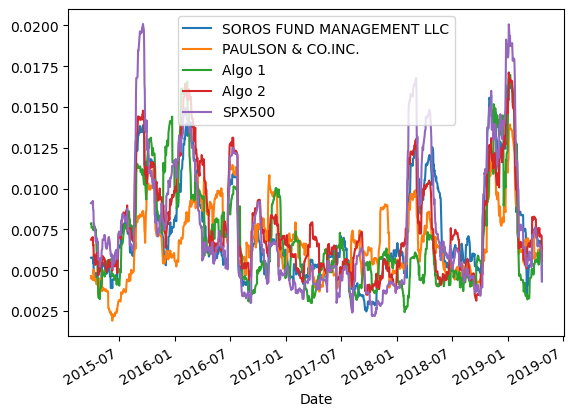

In [347]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
portfolio_rolling =combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
portfolio_rolling.plot()

### Calculate and plot the correlation

<Axes: >

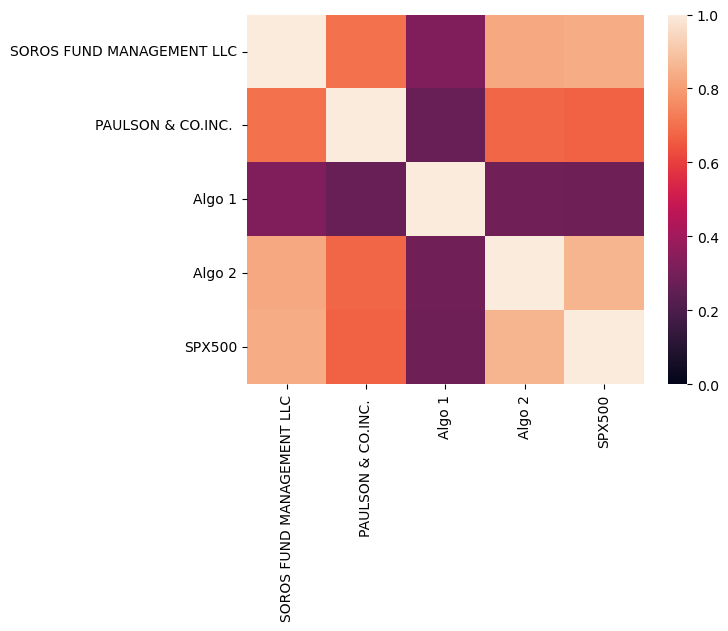

In [370]:
# Calculate the correlation
portfolio_correlation = combined_df.corr()
portfolio_correlation
# Display de correlation matrix
sns.heatmap(portfolio_correlation, vmax=1, vmin=0)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [374]:
# Calculate covariance of a single portfolio
cov_algo = algo_data.cov()


# Calculate variance of S&P 500
var_spx500 = spx_daily_returns.var()
var_spx500
# Computing beta
beta = cov_algo / var_spx500
# Plot beta trend
beta


,Algo 1,Algo 2,SPX500
Algo 1,NaN,NaN,NaN
Algo 2,NaN,NaN,NaN


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [385]:
# Use `ewm` to calculate the rolling window
rolling_ewm = combined_df.ewm(span=21).std()
rolling_ewm.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,Algo 1,Algo 2,SPX500
Date,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.004700,0.002380,0.000106
2015-03-05,0.002658,0.004896,0.004182,0.002645,0.003342
2015-03-06,0.005515,0.004592,0.003386,0.007399,0.006714
2015-03-09,0.004716,0.004434,0.002929,0.006422,0.007332


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [375]:
# Annualized Sharpe Ratios
sharp_ratios = ((combined_df.mean()-combined_df['SPX500'].mean()) * 252)
sharp_ratios

SOROS FUND MANAGEMENT LLC   -0.043354
PAULSON & CO.INC.           -0.141938
Algo 1                       0.078745
Algo 2                      -0.021630
SPX500                       0.000000
dtype: float64

<Axes: title={'center': 'Sharp Ratios'}>

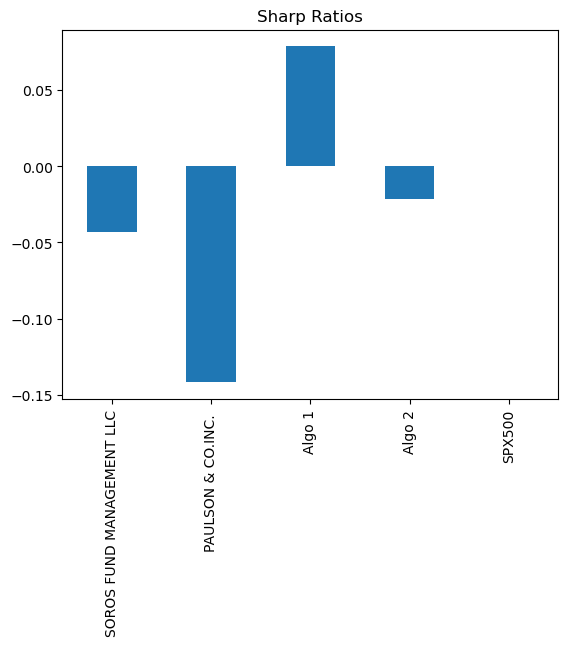

In [376]:
# Visualize the sharpe ratios as a bar plot
sharp_ratios.plot(kind="bar", title="Sharp Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [353]:
# Reading data from 1st stock
aapl_csv = Path("Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_df.sort_index(inplace=True)
aapl_df.head()


,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [354]:
# Reading data from 2nd stock
cost_csv = Path("Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df.sort_index(inplace=True)
cost_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [355]:
# Reading data from 3rd stock
goog_csv = Path("Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df.sort_index(inplace=True)
goog_df.head()


,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [356]:
# Combine all stocks in a single DataFrame
stocks_df = pd.concat([aapl_df, cost_df, goog_df], axis="rows", join="inner" )
stocks_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [357]:
# Reset Date index
stocks_df = stocks_df.reset_index()

In [358]:
# Reorganize portfolio data by having a column per symbol
stocks_df = stocks_df.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
stocks_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [359]:
# Calculate daily returns
stocks_df = stocks_df.pct_change()

# Drop NAs
stocks_df.dropna(inplace=True)

# Display sample data
stocks_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [360]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
#portfolio_returns = weights[0] * stocks_df["AAPL"] + weights[1] * stocks_df["COST"] + weights[2] * stocks_df["GOOG"]
portfolio_returns = stocks_df.dot(weights)
# Display sample data
portfolio_returns.head()


Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [361]:
# Join your returns DataFrame to the original returns DataFrame
all_returns_df = pd.concat([stocks_df, portfolio_returns], axis="columns", join="inner")
#all_returns_df.columns = all_returns_df["Symbol","AAPL", "COST", "GOOG", "ALL"]
all_returns_df.head()
all_returns_df.count()

AAPL    249
COST    249
GOOG    249
0       249
dtype: int64

In [362]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns_df.dropna()
all_returns_df.head()
all_returns_df.count()

AAPL    249
COST    249
GOOG    249
0       249
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [363]:
# Calculate the annualized `std`
all_returns_df.std()


AAPL    0.018706
COST    0.013186
GOOG    0.016602
0       0.013245
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Trade DATE'>

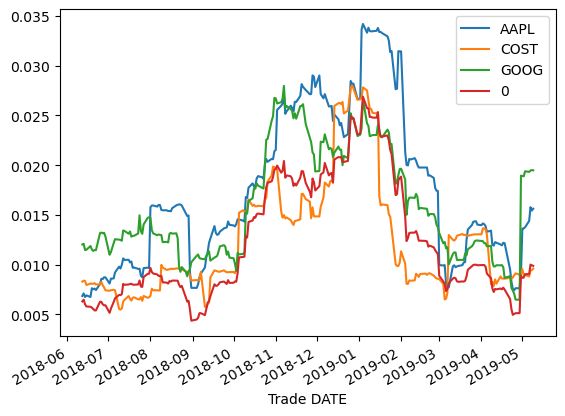

In [364]:
# Calculate rolling standard deviation
rolling_std = all_returns_df.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std.plot()

### Calculate and plot the correlation

<Axes: >

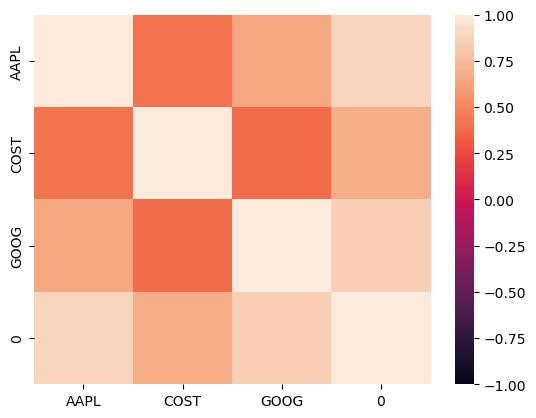

In [365]:
# Calculate and plot the correlation
correlation = all_returns_df.corr()
sns.heatmap(correlation, vmax=1, vmin= -1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [366]:
# Calculate and plot Beta
coveriance = stocks_df.rolling(window=60).cov(spx_daily_returns)
coveriance

,AAPL,COST,GOOG,SPX500
2012-10-02,NaN,NaN,NaN,NaN
2012-10-03,NaN,NaN,NaN,NaN
2012-10-04,NaN,NaN,NaN,NaN
2012-10-05,NaN,NaN,NaN,NaN
2012-10-08,NaN,NaN,NaN,NaN
...,...,...,...,...
2019-05-03,NaN,NaN,NaN,NaN
2019-05-06,NaN,NaN,NaN,NaN
2019-05-07,NaN,NaN,NaN,NaN
2019-05-08,NaN,NaN,NaN,NaN


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [367]:
# Calculate Annualized Sharpe Ratios


In [368]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!